# Project description:

Dr. Zeus has gathered some data from 1000 patients that have diabetes in a timespan of a year. The data has several columns depicting various information regarding how they are managing their condition. 

- 'Kolku dolgo e dijabeticar' - a column depicting (in years) the length of the condition that the patient has had,


- 'Kolku mu e tromesechen (hemoglobin A1C) she4er' - a column depicting the last measured value of the hemoglobin A1C sugar levels every three months., 


- 'Dali e na insulin ili na tabli?' - information whether a patient is on insulin (value 1) or tablets (value 0), 


- 'Glukoza (momentalna) vo krv' - information about current glucose level, 


- 'Dali ima dijabetesna retinopatija?' - information whether the patient has (value 1) or does not have (value 0) diabetic retinopathy.

    ## What needs to be done?


- 1. In the Drive folder you have a dataset 'Diabetes_data.csv', read the dataset into Pandas.


- 2. The data is slopily gathered and you need to rename, correct, and handle missing values. Check to see if any of the columns have null/missing values and determine the best strategy for cleaning up the data (including not doing anything). ..........(3 points total)


- 3. Find the patient which currently has the highest glucose level. Sketch (on a plot of your choice) all of the patients glucose levels and describe the plot. Draw a conclusion on how the data behaves. .......... (3 points)


- 4. Find the average number of hemoglobin A1C levels of patients per length of disease. Which duration of the disease has the highest average glucose levels? Sketch the data on a plot of your choice to best describe the data. Write a sentence or two describing how the data behaves.   .......... (3 points)


- 5. Find the average duration of the disease for patients that are on insulin and patients that are on tablets. Compare the results. Which method that the patients use shows better results? .......... (3 points)


- 6. A normal hemoglobin A1C glucose level is below 5.7. Divide the data in 2 groups (patients that have normal A1C level and patients that have elevated A1C level), then sketch the data using a plot of your choice dependent on the length of the disease. Distinguishing both groups. .......... (4 points)


- 7. How do factors influence the outcome whether a patient will have (or not) diabetic retinopathy? Analyse whether there is a correlation or not between diabetic retinopathy and other data in the set. Do this by separating the patients into 2 groups and analyzing the characteristics of the groups with respect to various information. Plot various data points if possible. .......... (4 points)

---

### Libraries:

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

---

### 1. In the Drive folder you have a dataset 'Diabetes_data.csv', read the dataset into Pandas.

In [74]:
df = pd.read_csv("Diabetes_data.csv")

df.head(5)

,Unnamed: 0,Kolku dolgo e dijabeticar,Kolku mu e tromesechen (hemoglobin A1C) she4er,Dali e na insulin ili na tabli?,Glukoza (momentalna) vo krv,Dali ima dijabetesna retinopatija?
0,0,3.0,9.522692,0.0,1.747037,1.0
1,1,40.0,6.397994,0.0,6.416253,1.0
2,2,38.0,7.079202,0.0,7.006710,0.0
3,3,16.0,4.400294,1.0,5.614222,0.0
4,4,17.0,4.746816,1.0,4.919372,1.0


---

### 2. The data is slopily gathered and you need to rename, correct, and handle missing values. Check to see if any of the columns have null/missing values and determine the best strategy for cleaning up the data (including not doing anything).

In [75]:
# Rename all columns

df = df.rename(columns = {"Kolku dolgo e dijabeticar":"Period of Years as Diabetic",
                    "Kolku mu e tromesechen (hemoglobin A1C) she4er":"3months Hemoglobin Level",
                     "Dali e na insulin ili na tabli?": "Insulin / Pills",
                    "Glukoza (momentalna) vo krv" : "Current Level of Glycemia",
                    "Dali ima dijabetesna retinopatija?":"Diabetic retinopathy"})

In [76]:
# Delete column "Unnamed: 0"

del df['Unnamed: 0']

In [77]:
# Checking and handling null/missing values 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Period of Years as Diabetic  979 non-null    float64
 1   3months Hemoglobin Level     973 non-null    float64
 2   Insulin / Pills              988 non-null    float64
 3   Current Level of Glycemia    986 non-null    float64
 4   Diabetic retinopathy         970 non-null    float64
dtypes: float64(5)
memory usage: 39.2 KB


In [78]:
# Finding the % of nulls values in each columns with function

def find_nan_percentages(df):   
    
    result = dict()

    for column in df.columns:

        nan_percentage = round(df[column].isna().sum() / len(df[column]) * 100, 2)

        result[column] = nan_percentage

    stats_df = pd.DataFrame(result.values(), index=df.columns)

    return stats_df


nan_values = find_nan_percentages(df)
nan_values

,0
Period of Years as Diabetic,2.1
3months Hemoglobin Level,2.7
Insulin / Pills,1.2
Current Level of Glycemia,1.4
Diabetic retinopathy,3.0


In [79]:
#za kolona Period of Years as Diabetic - redovite se izbrisani 

df = df[df['Period of Years as Diabetic'].notna()]

In [98]:
#Za kolona '3months Hemoglobin Level' , popolneti so sredna vrednost

df['3months Hemoglobin Level'].fillna(df['3months Hemoglobin Level'].mean(),inplace = True)

In [44]:
#Za kolona Insulin / Pills, ramnomerna raspredelba so postoeckite vrednosti 1 i 0

df['Insulin / Pills'].value_counts()

df[df['Insulin / Pills'].isnull()].index.tolist()  #total 11

df['Insulin / Pills'] = df['Insulin / Pills'].fillna(value = 1, limit = 6)

df['Insulin / Pills'] =df['Insulin / Pills'].fillna(value = 0, limit = 5)


In [45]:
#Za kolona 'Current Level of Glycemia' , popolneti so sredna vrednost

df['Current Level of Glycemia']=df['Current Level of Glycemia'].fillna(df['Current Level of Glycemia'].mean())

In [50]:
#Za kolona Diabetic retinopathy, ramnomerna raspredelba so postoeckite vrednosti 1 i 0

df['Diabetic retinopathy'].value_counts()

df[df['Diabetic retinopathy'].isnull()].index.tolist()

df['Diabetic retinopathy'] = df['Diabetic retinopathy'].fillna(value = 1.0, limit = 15)

df['Diabetic retinopathy'] = df['Diabetic retinopathy'].fillna(value = 1.0, limit = 15)



In [52]:
# DataFrame sostojba

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 979 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Period of Years as Diabetic  979 non-null    float64
 1   3months Hemoglobin Level     979 non-null    float64
 2   Insulin / Pills              979 non-null    float64
 3   Current Level of Glycemia    979 non-null    float64
 4   Diabetic retinopathy         979 non-null    float64
dtypes: float64(5)
memory usage: 45.9 KB


---

### 3. Find the patient which currently has the highest glucose level. Sketch (on a plot of your choice) all of the patients glucose levels and describe the plot. Draw a conclusion on how the data behaves.

In [53]:
df.columns

Index(['Period of Years as Diabetic', '3months Hemoglobin Level',
       'Insulin / Pills', 'Current Level of Glycemia', 'Diabetic retinopathy'],
      dtype='object')

In [58]:
df.groupby('Current Level of Glycemia')['Current Level of Glycemia'].max().sort_values(ascending = False)

df[df['Current Level of Glycemia'] ==df['Current Level of Glycemia'].max()]


,Period of Years as Diabetic,3months Hemoglobin Level,Insulin / Pills,Current Level of Glycemia,Diabetic retinopathy
664,36.0,6.521587,1.0,12.598831,0.0


<AxesSubplot:xlabel='Period of Years as Diabetic', ylabel='Current Level of Glycemia'>

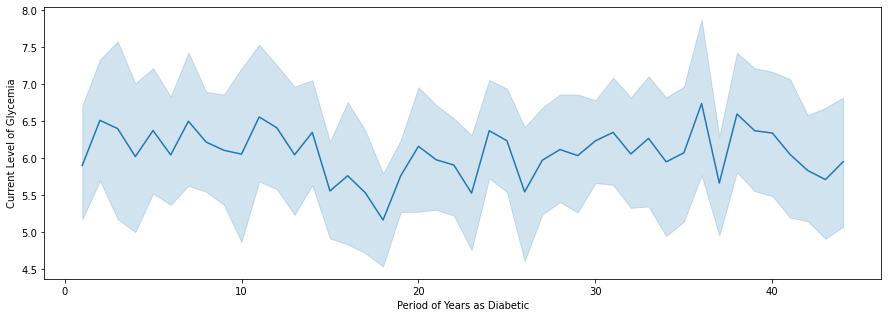

In [61]:
# Visualization

plt.figure(figsize=(15,5))

sns.lineplot(data = df, x ='Period of Years as Diabetic', y = 'Current Level of Glycemia')


#Od prikazaniot grafik moze da zaklucime deka, najvisoko nivo na seker ima kaj pacientite koj se veke nad 35 godini dijabeticari, 
# dodeka najnisko nivo ima kaj pacientite sto se dijabeticari pomedju 15 i 20 godini .

---

### 4. Find the average number of hemoglobin A1C levels of patients per length of disease. Which duration of the disease has the highest average glucose levels? Sketch the data on a plot of your choice to best describe the data. Write a sentence or two describing how the data behaves.

<AxesSubplot:xlabel='Period'>

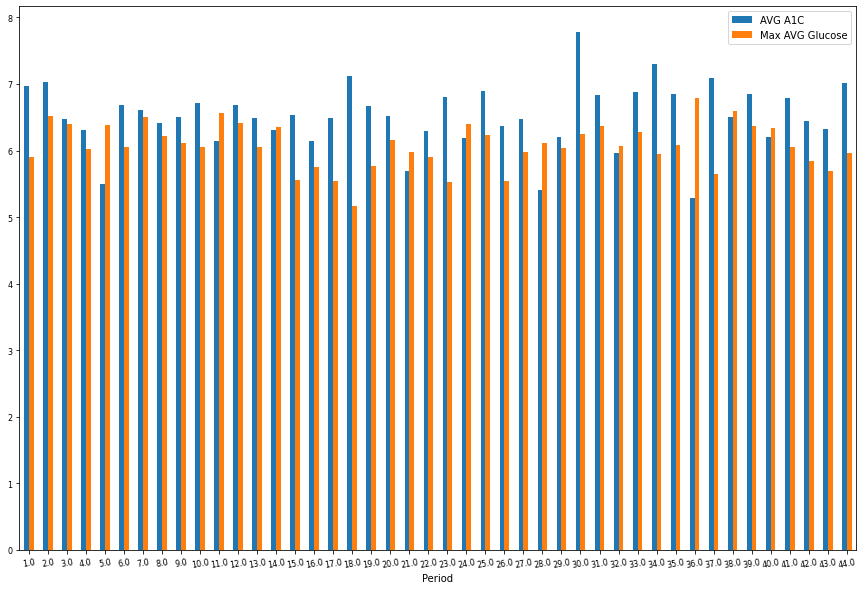

In [186]:
avg_a1c = df.groupby('Period of Years as Diabetic')['3months Hemoglobin Level'].mean()

max_avg_glucose = df.groupby('Period of Years as Diabetic')['Current Level of Glycemia'].mean()

df_avg_a1c = pd.DataFrame()
df_avg_a1c['Period'] = avg_a1c.index
df_avg_a1c['AVG A1C'] =avg_a1c.values

df_max_avg_glucose=pd.DataFrame()
df_max_avg_glucose['Period']=max_avg_glucose.index
df_max_avg_glucose['Max AVG Glucose']=max_avg_glucose.values


merge_data = pd.merge(df_avg_a1c,df_max_avg_glucose, on="Period")


fig, ax = plt.subplots()
merge_data.plot.bar(x = 'Period', y = ['AVG A1C', 'Max AVG Glucose'],figsize=(15, 10),fontsize=8, rot = 10, ax = ax)


# Vo glabola, mozeme da zaklicume deka prosecnata vrednost na hemoglobin vo princip e pogolema od max vrednost an sekerot.
#Najvisokite vrednosti se vo periodot od 30 do 40 god.

---

### 5. Find the average duration of the disease for patients that are on insulin and patients that are on tablets. Compare the results. Which method that the patients use shows better results?

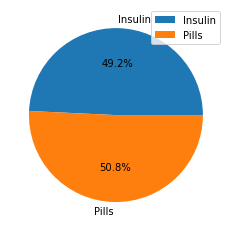

In [191]:
df1 = df.groupby('Insulin / Pills')['Period of Years as Diabetic'].mean()

mylabels = ['Insulin','Pills']

plt.pie(df1,labels = mylabels,autopct='%1.1f%%')
plt.legend()


#Od samiot pie char zaklucuvame deka,skoro i da nema razlika dali pacinetite koristat insulin ili tableti. 
#Prosecniot period na bolesta e skoro identicen.

---

### 6. A normal hemoglobin A1C glucose level is below 5.7. Divide the data in 2 groups (patients that have normal A1C level and patients that have elevated A1C level), then sketch the data using a plot of your choice dependent on the length of the disease. Distinguishing both groups.

In [192]:
df.columns

Index(['Period of Years as Diabetic', '3months Hemoglobin Level',
       'Insulin / Pills', 'Current Level of Glycemia', 'Diabetic retinopathy'],
      dtype='object')

C:\Users\trpe8\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\trpe8\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


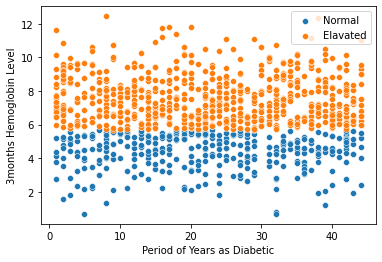

In [205]:
normal = df[df['3months Hemoglobin Level'] <= 5.7]
elavated =  df[df['3months Hemoglobin Level'] > 5.7]

sns.scatterplot( normal['Period of Years as Diabetic'],normal['3months Hemoglobin Level'])
sns.scatterplot( elavated['Period of Years as Diabetic'],elavated['3months Hemoglobin Level'])



---

### 7. How do factors influence the outcome whether a patient will have (or not) diabetic retinopathy? Analyse whether there is a correlation or not between diabetic retinopathy and other data in the set. Do this by separating the patients into 2 groups and analyzing the characteristics of the groups with respect to various information. Plot various data points if possible.

---